#What will be the value of the next player?
By Yamil Kas-Danouche

#Background

Given a database of approx 1435 different players of Fortnite which is a Videogame, batteroyale which was created in 2017. This videogame has 4 mode of playing: Solo, Duo, Trio, or Squad but due to the extensive ammount of data I will only be using the values of the Solo mode for all these 1435 players. The dataset can be found in this link https://www.kaggle.com/datasets/iyadali/fortnite-players-stats?resource=download 

#Problem statement

Depending on the stats of such players, can the stats of a new player be determined?

#Input/Output
input: different values of data only related to solo game-mode of different players. Output: The predicted value for each player.

#Type of problem
Prediction of future values; Regression

#Features and attributes
The raw Features of Solo score, Solo top1, Solo kd, Solo winRatio, Solo matches, Solo kills, Solo minutesPlayed, and I believe will improve classifier performance.


#Desired evaluation metric
Recall and Prediction are really important here because the purpose of the project is to predict new values using training values

In [ ]:
import os

os.environ['KAGGLE_USERNAME']='yamilkasdanouche'   # your kaggle username
os.environ['KAGGLE_KEY']='3edf4af72a4808d814d9d715b9285783' # your kaggle API key

! kaggle datasets download -d iyadali/fortnite-players-stats
! unzip fortnite-players-stats.zip

100% 139k/139k [00:00<00:00, 343kB/s]
100% 139k/139k [00:00<00:00, 343kB/s]
Archive:  fortnite-players-stats.zip
  inflating: Fortnite_players_stats.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from warnings import filterwarnings
filterwarnings('ignore')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
dataBase = pd.read_csv('Fortnite_players_stats.csv',usecols = [1,2,3,4,5,6,7])

The first column that has the names of the players and the other columns that have values of types of game modes other than solo, will be ignored.

#Inspecting the data/drawing inferences

In [ ]:
print(dataBase.keys())

Index(['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches',
       'Solo kills', 'Solo minutesPlayed'],
      dtype='object')


In [ ]:
dataBase[:5]

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,2476763,1828,4.37,18.0,10150,36328,81389
1,439562,1694,8.71,29.1,5817,35895,12732
2,4519465,4582,9.60,34.0,13488,85481,122171
3,752869,121,0.84,3.3,3687,3005,32453
4,1136282,1327,6.32,30.0,4429,19591,36245


In [ ]:
dataBase.describe()

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
count,1.435000e+03,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,1.088202e+06,328.909408,1.816300,4.853937,6911.060627,11781.843206,43517.135889
std,8.872639e+05,529.192568,1.156026,5.330249,5408.219523,11417.340071,36314.877771
min,4.453000e+03,0.000000,0.080000,0.000000,30.000000,28.000000,210.000000
25%,4.355170e+05,65.500000,1.050000,1.600000,2875.000000,3861.000000,16922.000000
50%,9.070010e+05,162.000000,1.480000,2.900000,5728.000000,8452.000000,35762.000000
75%,1.506555e+06,366.000000,2.200000,6.100000,9585.000000,15993.000000,59471.000000
max,6.772116e+06,6480.000000,9.600000,44.100000,36487.000000,89023.000000,283835.000000


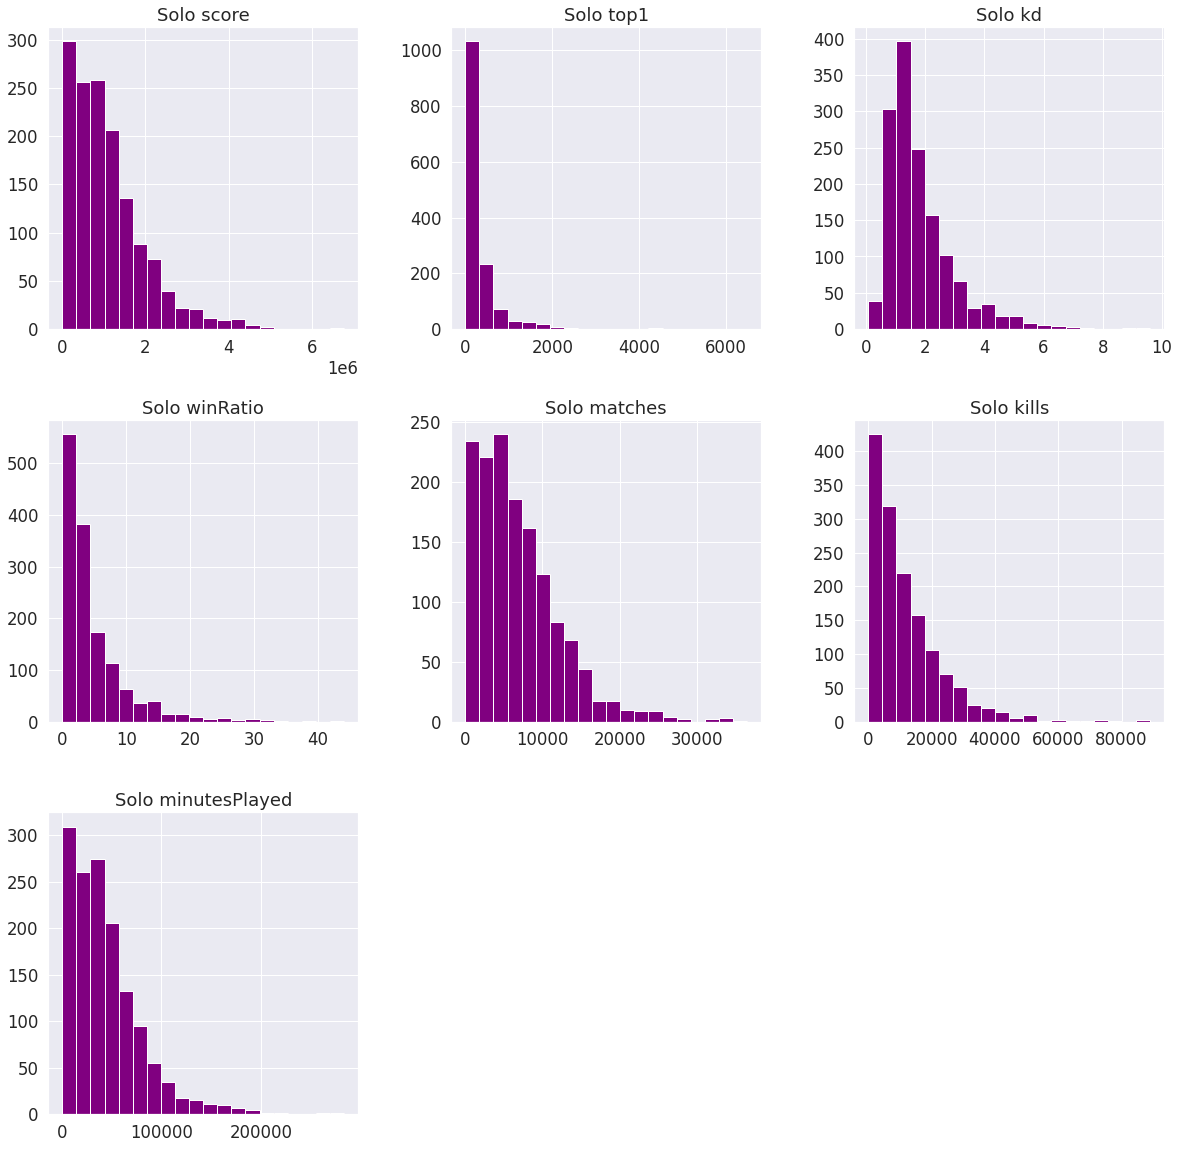

In [ ]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
axis = dataBase.hist(bins = 20, color = 'purple')

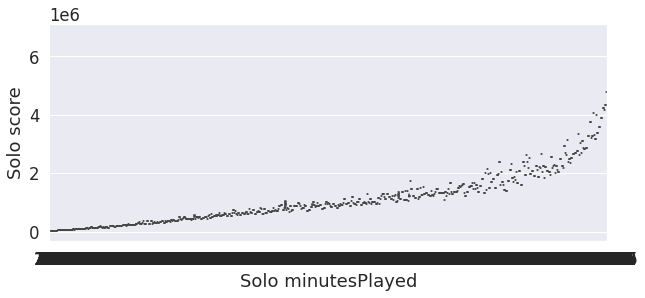

In [ ]:
# Solo minutesPlayed vs Solo Score
plt.figure(figsize=(10,4))
sns.boxplot(data=dataBase, x = 'Solo minutesPlayed', y = 'Solo score')

As we can see from the graph, as the player has more minutes played, its score increases.

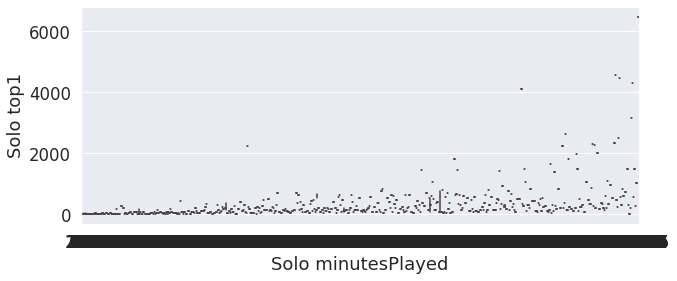

In [ ]:
# Solo minutesPlayed vs Solo top1
plt.figure(figsize=(10,4))
sns.boxplot(data=dataBase, x = 'Solo minutesPlayed', y = 'Solo top1')

As we can see from the graph, as the player has more minutes played, the number of times that the player finishes in 1rst place stays in average almost the same but increases for a few players

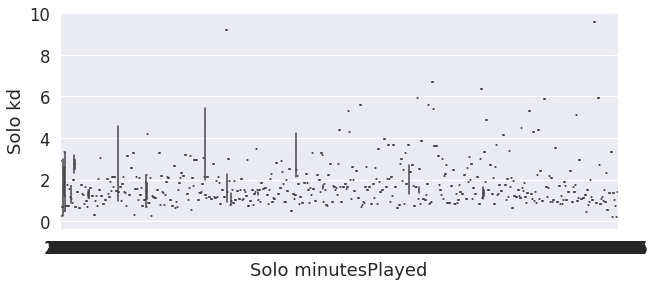

In [ ]:
# Solo minutesPlayed vs Solo kd
plt.figure(figsize=(10,4))
sns.boxplot(data=dataBase, x = 'Solo minutesPlayed', y = 'Solo kd')

As we can see from the graph, as the player has more minutes played, its solo kd score increases from zero but stays almost the same after, which means that the match making algorithm of Fortnite is very good because as the skills of the player get better the matching system will create matches with people of the level of the player to fight with.

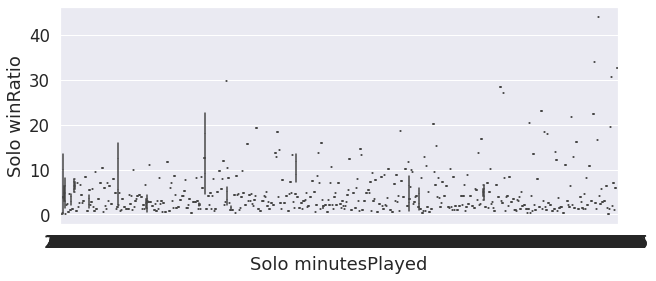

In [ ]:
# Solo minutesPlayed vs Solo winRatio
plt.figure(figsize=(10,4))
sns.boxplot(data=dataBase, x = 'Solo minutesPlayed', y = 'Solo winRatio')

As we can see from the graph, as the player has more minutes played, its solo win ratio increases for some players, but in mayority it stays the same.

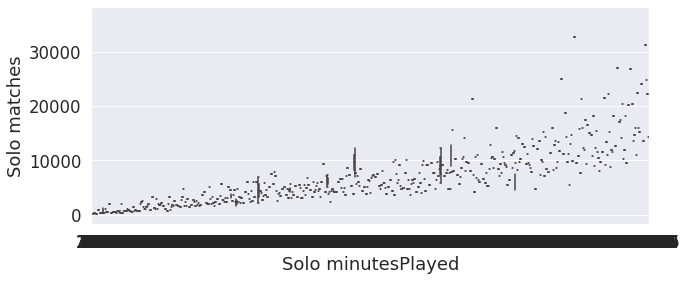

In [ ]:
# Solo minutesPlayed vs Solo matches
plt.figure(figsize=(10,4))
sns.boxplot(data=dataBase, x = 'Solo minutesPlayed', y = 'Solo matches')

As is expected, the player more minutes the player has, the more matches he has played. There are some fluctuation on this due to the fact that there are some players that die really quick and others that normally survive the longest, which means that as time goes the fluctuation of the slope will increase.

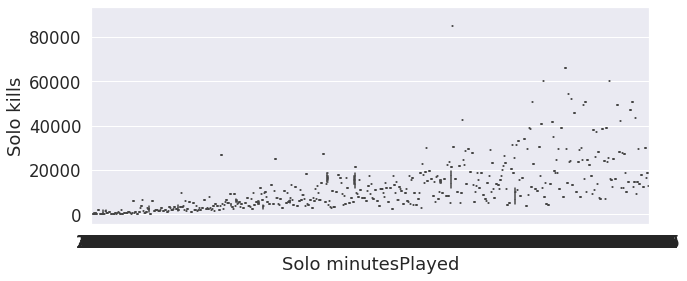

In [ ]:
# Solo minutesPlayed vs Solo kills
plt.figure(figsize=(10,4))
sns.boxplot(data=dataBase, x = 'Solo minutesPlayed', y = 'Solo kills')

Like for Solo 1rst player, some players will have a lot of kills in little time and some that will barely kill 1 in a 1000 matches( maybe bots) so as time increases, the number of kill fluctuates from 0 kills to almost 80k kills.

In [ ]:
X = dataBase.iloc[:,:6].values #all rows - column 1 to 6 (x)
y = dataBase.iloc[:,6].values # minutes column (y)
print(X[:5])
print(y[:5])

[[2.476763e+06 1.828000e+03 4.370000e+00 1.800000e+01 1.015000e+04
  3.632800e+04]
 [4.395620e+05 1.694000e+03 8.710000e+00 2.910000e+01 5.817000e+03
  3.589500e+04]
 [4.519465e+06 4.582000e+03 9.600000e+00 3.400000e+01 1.348800e+04
  8.548100e+04]
 [7.528690e+05 1.210000e+02 8.400000e-01 3.300000e+00 3.687000e+03
  3.005000e+03]
 [1.136282e+06 1.327000e+03 6.320000e+00 3.000000e+01 4.429000e+03
  1.959100e+04]]
[ 81389  12732 122171  32453  36245]


#Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.2,
                                                    random_state = 10)
print(len(dataBase))
print(len(x_train))
print(len(x_test))

1435
1148
287


#Creating a training and testing set.

In [ ]:
x_test.shape, y_test.shape

((287, 6), (287,))

In [ ]:
model = Sequential(
    [
        Dense(75, activation='relu'),
        Dense(75, activation='relu'),
        Dense(1)
    ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [ ]:
history = model.fit(
    x_train, y_train, 
    epochs=1000,
)

Epoch 1/1000
36/36 [==============================] - 1s 3ms/step - loss: 1540202240.0000 - mae: 11178.3818 - mse: 1540202240.0000
Epoch 2/1000
36/36 [==============================] - 0s 3ms/step - loss: 688013312.0000 - mae: 12271.8086 - mse: 688013312.0000
Epoch 3/1000
36/36 [==============================] - 0s 3ms/step - loss: 908802496.0000 - mae: 14498.8848 - mse: 908802496.0000
Epoch 4/1000
36/36 [==============================] - 0s 3ms/step - loss: 371154016.0000 - mae: 10433.0820 - mse: 371154016.0000
Epoch 5/1000
36/36 [==============================] - 0s 3ms/step - loss: 428399456.0000 - mae: 12208.5107 - mse: 428399456.0000
Epoch 6/1000
36/36 [==============================] - 0s 3ms/step - loss: 563096832.0000 - mae: 13133.5479 - mse: 563096832.0000
Epoch 7/1000
36/36 [==============================] - 0s 3ms/step - loss: 404118720.0000 - mae: 9180.1025 - mse: 404118720.0000
Epoch 8/1000
36/36 [==============================] - 0s 3ms/step - loss: 517201600.0000 - mae: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
995,11004479.0,1986.175781,11004479.0,995
996,10585475.0,1966.032471,10585475.0,996
997,9553170.0,1937.878296,9553170.0,997
998,11839166.0,2002.261719,11839166.0,998
999,11144401.0,2026.097290,11144401.0,999


In [ ]:
predictions = model.predict(x_test)
print("predictions = \n", predictions[5:15])
print("\ncurrents = \n",y_test[5:15])

9/9 [==============================] - 0s 1ms/step
predictions = 
 [[ 87923.8   ]
 [  2740.2131]
 [ 57947.82  ]
 [155657.9   ]
 [ 80334.06  ]
 [ 34966.29  ]
 [ 24731.426 ]
 [107112.5   ]
 [  4863.6494]
 [ 13789.938 ]]

currents = 
 [ 79177   2541  56422 145643  74110  31754  22503 104420   4360  13415]


#Checking a sample:
As we can see from the numbers ina column and a row above, the numbers of predictions are very close to each other and predictions like this one happens for a lot of new predicted players. It wouldn't make sense to calculate the accuracy due to the fact that the numbers that are being predicted are very big.

9/9 [==============================] - 0s 2ms/step


[]

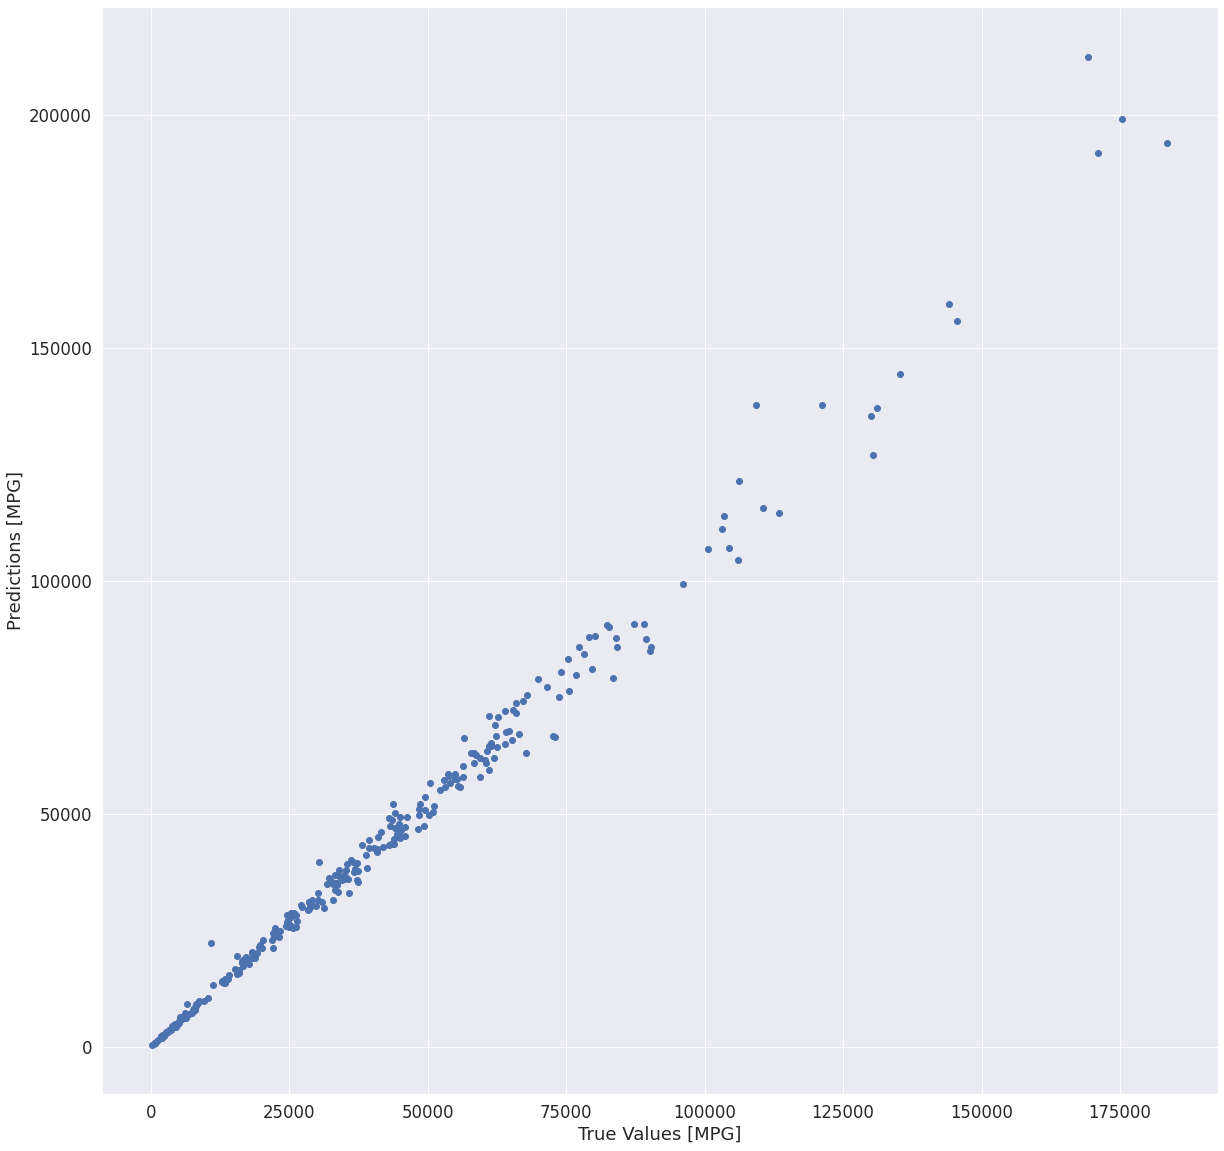

In [ ]:
test_predictions = model.predict(x_test[:]).flatten()

plt.scatter(y_test[:], test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

plt.plot()

#Comparing the predicted value to the True value
This plot reflects a linear plot of the values generated and the values compared, so the more linear the line is, the more precise the algorithm is. The slope is almost straight which means that the predictions are very close to accurate, or accurate.

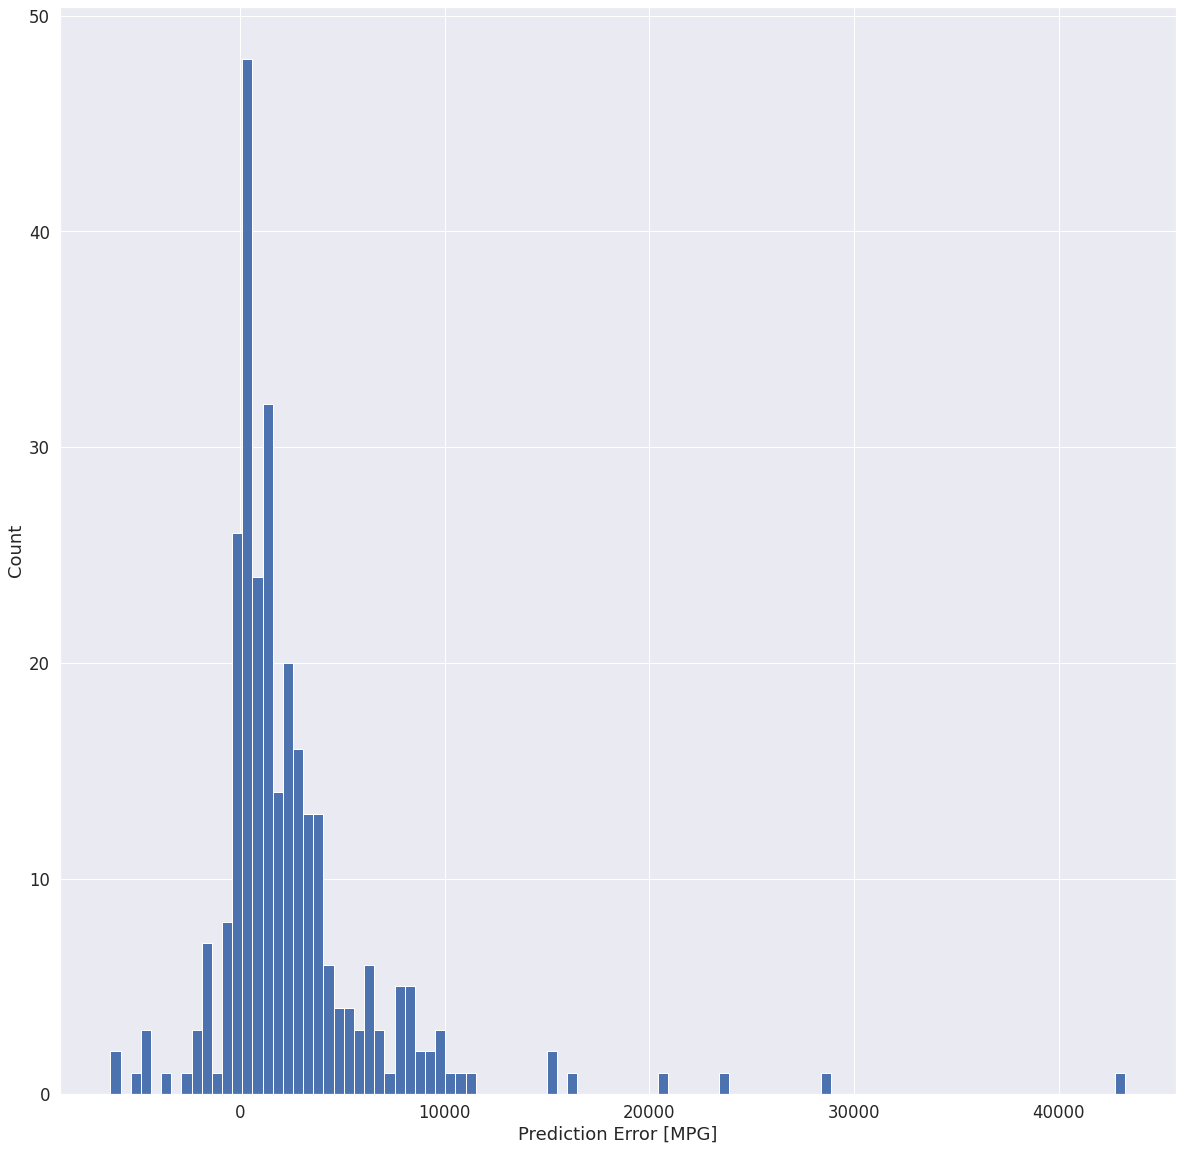

In [ ]:
error = test_predictions - y_test[:]
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

#Finding the difference
By substracting the original value to the predicted value we can plot the counts of how many numbers have big gaps and how many numbers actually dont have any difference. As we can see in the slope, such slope extends like a piramid having its middle and higher point on the zero count, which means that a very big amount of numbers have been correctly predicted. 

#Conclusion
I am pleased to say that more than the 80% of the values of the MPG are values lower than $\pm$ 5000, so the difference is not that extensive, taking into account that some values are as high as 30k, 5k is actually good for a prediction. It's a fact that When I tested the neural network at 64 of density, the pyramid of MPG was centered at 5000, but after it was increased to 100, the center became 0. But I believe that increasing the number of neurons higher than 100 will not improve the MPG for much.  

##Implementations
If I had more time I would implement on the dataset so that whenever a player enters his minutes played, the algorithm would predict his other values and classify him as a casual player, hardcore player, or just a beginner(noob) player.